# Import data

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import torch

np.set_printoptions(formatter={'float': '{:.3f}'.format})


In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.drop(columns=['quality', 'density']).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

#### Drawing boxplot for checking outliers

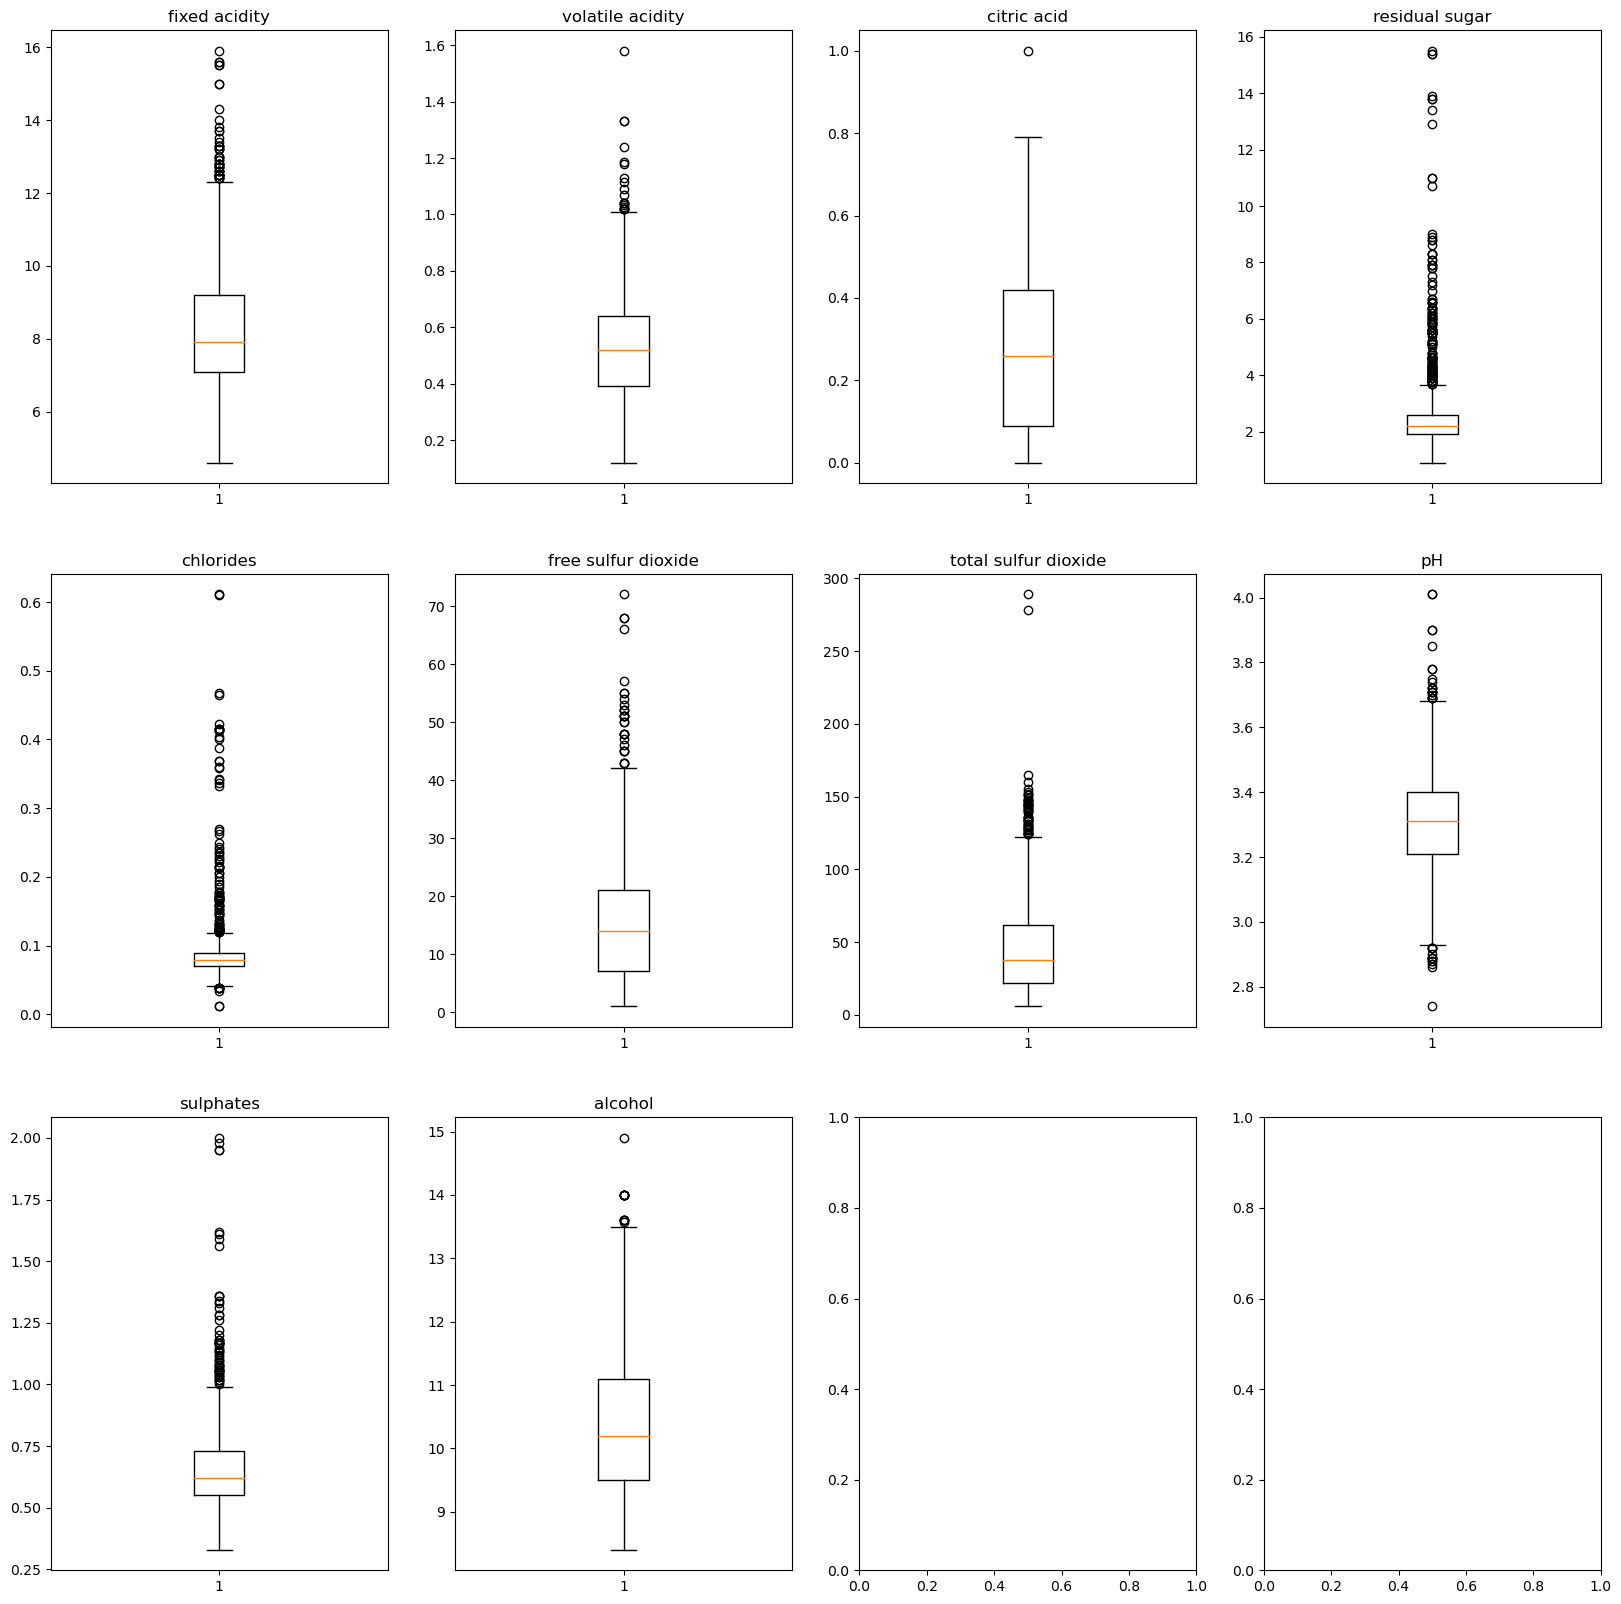

In [6]:
fig, ax = plt.subplots(3, 4, figsize=(20, 20))

for i, column in enumerate(df.drop(columns=['quality', 'density']).columns):
    ax[i // 4][i % 4].boxplot(df[column])
    ax[i // 4][i % 4].set_title(column)
plt.show()

#### Drawing heatmap for checking correlation between features
- High correlation between alcohol vs quality
- High correlation between fixed acidity vs ph, fixed acidity vs density, fixed acidity vs critic acid

<Axes: >

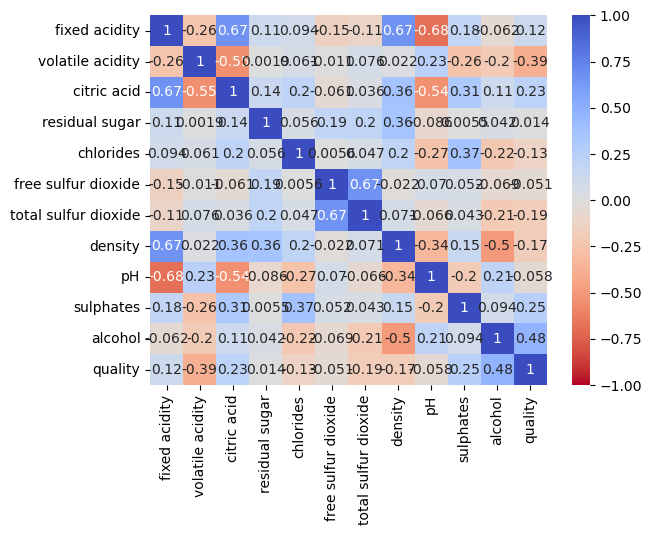

In [7]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm_r', annot=True)

In [8]:
#sns.pairplot(df)

#### Split train/valid/test with 70:15:15

In [9]:
# quality: target
from sklearn.model_selection import train_test_split

train_X, ee_X, train_y, ee_y = train_test_split(df.drop(columns=['quality']), df['quality'], test_size=0.3, random_state=42)
valid_X, test_X, valid_y, test_y = train_test_split(ee_X, ee_y, test_size=0.5, random_state=42)

len(train_X) / len(df), len(valid_X) / len(df), len(test_X) / len(df)

(0.699812382739212, 0.150093808630394, 0.150093808630394)

In [10]:
train_X, valid_X, test_X = map(torch.tensor, (train_X.to_numpy(), valid_X.to_numpy(), test_X.to_numpy()))
train_X = train_X.float()
valid_X = valid_X.float()
test_X = test_X.float()
print(f'train_X shape: {train_X.shape}')
print(f'valid_X shape: {valid_X.shape}')
print(f'test_X shape: {test_X.shape}')

train_X shape: torch.Size([1119, 11])
valid_X shape: torch.Size([240, 11])
test_X shape: torch.Size([240, 11])


In [11]:
train_y, valid_y, test_y = map(torch.tensor, (train_y.to_numpy(), valid_y.to_numpy(), test_y.to_numpy()))
print(f'train_y shape: {train_y.shape}')
print(f'valid_y shape: {valid_y.shape}')
print(f'test_y shape: {test_y.shape}')

train_y shape: torch.Size([1119])
valid_y shape: torch.Size([240])
test_y shape: torch.Size([240])


We need to change the shape of _y from torch.Size[value] -> torch.size([value, 1])

In [12]:
train_y = torch.reshape(train_y, (train_y.shape[0], 1))
valid_y = torch.reshape(valid_y, (valid_y.shape[0], 1))
test_y = torch.reshape(test_y, (test_y.shape[0], 1))
print(f'train_y shape: {train_y.shape}')
print(f'valid_y shape: {valid_y.shape}')
print(f'test_y shape: {test_y.shape}')

train_y shape: torch.Size([1119, 1])
valid_y shape: torch.Size([240, 1])
test_y shape: torch.Size([240, 1])


# Creating a basic MLP

#### Preparing dataset and dataloader

In [13]:
from torch.utils.data import Dataset

class WindQualityDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return len(self.X)

In [14]:
train_data = WindQualityDataset(train_X, train_y)
valid_data = WindQualityDataset(valid_X, valid_y)

In [15]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=8, shuffle=True)
valid_loader = DataLoader(dataset=valid_data, batch_size=8, shuffle=True)

In [16]:
import torch.nn as nn
class BasicMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(BasicMLP, self).__init__()
        
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs
        
        self.fc1 = torch.nn.Linear(self.inputs, self.hidden)
        self.fc2 = torch.nn.Linear(self.hidden, self.outputs)
        self.relu = torch.nn.ReLU()
    
    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [17]:
model = BasicMLP(train_X.shape[1], 5, 1)
model

BasicMLP(
  (fc1): Linear(in_features=11, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [18]:
# Training loop

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001)

epochs = 500

train_loss = []
valid_loss = []

for epoch in range(epochs):
    batch_loss = []
    model.train()

    for features, targets in train_loader:
        
        output = model.forward(features)
        loss = criterion(output, targets.float())
        batch_loss.append(loss.item())
        
        optimizer.zero_grad() 
        loss.backward() 
        
        optimizer.step() 
    
    model.eval()
    train_loss.append(sum(batch_loss) / len(batch_loss))
    
    hyp_valid = model.forward(valid_X)
    valid_loss.append(criterion(hyp_valid, valid_y.float()).item())
    #print('Valid loss:', valid_loss[-1])

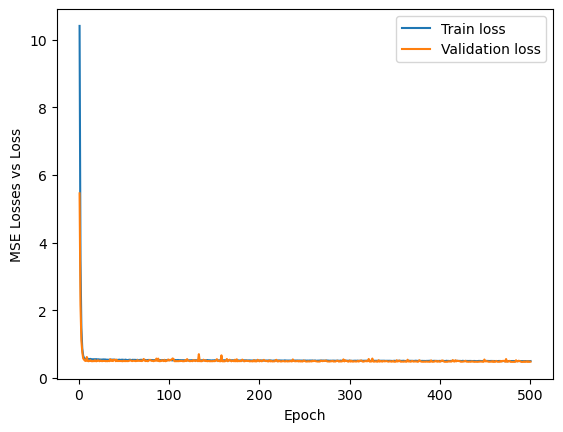

In [19]:
def plot_loss_curves(epochs, train_loss, valid_loss):
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, valid_loss, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Losses vs Loss')
    plt.legend()
    plt.show()
    
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [20]:
base_test_hyp = model(test_X)
base_test_loss = criterion(base_test_hyp, test_y.float()).item()
print(base_test_loss)

0.5119578838348389


# Making changes to basic MLP

### 1st advanced model 
- add hidden layers
- change optimizer to Adam 
- change activation function to LeakyReLu()

In [21]:
import torch.nn as nn
class AdvancedMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(AdvancedMLP, self).__init__()
        
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs
        
        self.fc1 = torch.nn.Linear(self.inputs, self.hidden)
        self.fc2 = torch.nn.Linear(self.hidden, self.hidden)
        self.fc3 = torch.nn.Linear(self.hidden, self.outputs)
        self.relu = torch.nn.LeakyReLU()
        
    
    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [22]:
advanced = AdvancedMLP(train_X.shape[1], 5, 1)
advanced

AdvancedMLP(
  (fc1): Linear(in_features=11, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
)

In [23]:
# Training loop

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params=advanced.parameters(), lr=0.0001)

epochs = 500

train_loss = []
valid_loss = []

for epoch in range(epochs):
    batch_loss = []
    advanced.train()

    for features, targets in train_loader:
        
        output = advanced.forward(features)
        loss = criterion(output, targets.float())
        batch_loss.append(loss.item())
        
        optimizer.zero_grad() 
        loss.backward() 
        
        optimizer.step() 
    
    advanced.eval()
    train_loss.append(sum(batch_loss) / len(batch_loss))
    
    hyp_valid = advanced.forward(valid_X)
    valid_loss.append(criterion(hyp_valid, valid_y.float()).item())
    #print('Valid loss:', valid_loss[-1])

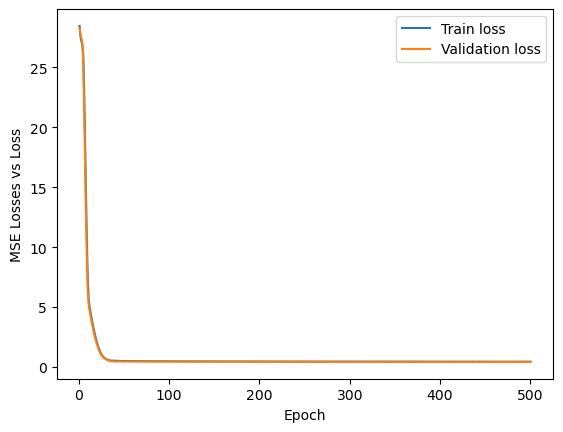

In [24]:
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss, valid_loss)

In [25]:
def display_mse_score(step, curr, base):
    improvement = ( np.abs(curr - base) / base) * 100
    print(f'MSE score({step}) is {curr:.3f} which is improved by {improvement:.2f} % (from {base:.3f} to {curr:.3f})')

In [26]:
advanced_test_hyp = advanced(test_X)
advanced_test_loss = criterion(advanced_test_hyp, test_y.float()).item()
display_mse_score('1st trial', advanced_test_loss, base_test_loss)

MSE score(1st trial) is 0.439 which is improved by 14.33 % (from 0.512 to 0.439)


### 2nd trial
Based on the 1st trial 
- add batch normalization
- add dropout which probability is 0.1

In [27]:
import torch.nn as nn
class Advanced2MLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(Advanced2MLP, self).__init__()
        
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs
        
        self.fc1 = torch.nn.Linear(self.inputs, self.hidden)
        self.bn1 = nn.BatchNorm1d(self.hidden, self.hidden) 
        self.fc2 = torch.nn.Linear(self.hidden, self.hidden)
        self.bn2 = nn.BatchNorm1d(self.hidden, self.hidden) 
        self.fc3 = torch.nn.Linear(self.hidden, self.outputs)
        self.relu = torch.nn.LeakyReLU()
        self.dropout = nn.Dropout(p = 0.1)
    
    def forward(self, X):
        out = self.fc1(X)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out

In [28]:
advanced2 = Advanced2MLP(train_X.shape[1], 5, 1)
advanced2

Advanced2MLP(
  (fc1): Linear(in_features=11, out_features=5, bias=True)
  (bn1): BatchNorm1d(5, eps=5, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (bn2): BatchNorm1d(5, eps=5, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [30]:
# Training loop
train_loader = DataLoader(dataset=train_data, batch_size=8, shuffle=True)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params=advanced2.parameters(), lr=0.001)
epochs = 500

train_loss_list = []
valid_loss_list = []

tolerance = 20

for epoch in range(epochs):
    batch_loss = []
    advanced2.train()

    for features, targets in train_loader:
        
        output = advanced2.forward(features)
        loss = criterion(output, targets.float())
        batch_loss.append(loss.item())
        
        optimizer.zero_grad() 
        loss.backward() 
        
        optimizer.step() 
    
    advanced2.eval()
    train_loss = sum(batch_loss) / len(batch_loss)
    train_loss_list.append(train_loss)
    
    hyp_valid = advanced2.forward(valid_X)
    valid_loss = criterion(hyp_valid, valid_y.float()).item()
    valid_loss_list.append(valid_loss)
print('valid_loss', valid_loss_list[-1])

valid_loss 0.41161173582077026


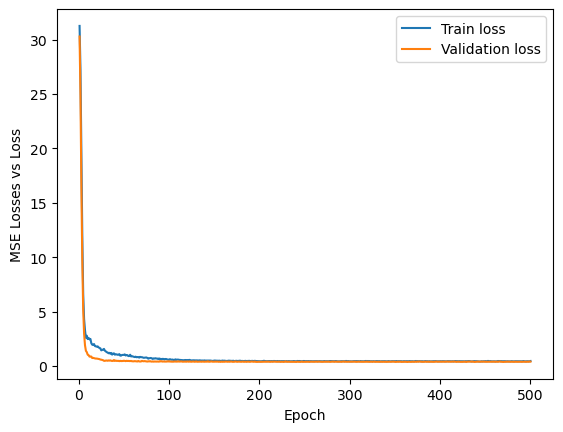

In [31]:
plot_loss_curves(np.linspace(1, epochs, epochs), train_loss_list, valid_loss_list)

In [32]:
advanced2_test_hyp = advanced2(test_X)
advanced2_test_loss = criterion(advanced2_test_hyp, test_y.float()).item()
display_mse_score('2nd trial', advanced2_test_loss, base_test_loss)

MSE score(2nd trial) is 0.419 which is improved by 18.14 % (from 0.512 to 0.419)


#### Conclusion 

In [33]:
'''
Base Model
- One hidden layer with 5 units
- Optimizer: SGD, Activation: ReLU
- Learning rate = 0.0001
'''
print(f'MSE score for base model is: {base_test_loss:.3f}')


'''
1st trial Model
- Two hidden layer with 5 units
- Optimizer: Adam, Activation: LeakyReLu
- Learning rate = 0.0001
'''
display_mse_score('1st trial', advanced_test_loss, base_test_loss)

'''
2nd trial Model
- Two hidden layer with 5 units
- Optimizer: Adam, Activation: LeakyReLu
- Learning rate = 0.0001
- add batch normalization 
- add droopout with probability of 0.1
'''
display_mse_score('2nd trial', advanced2_test_loss, base_test_loss)

MSE score for base model is: 0.512
MSE score(1st trial) is 0.439 which is improved by 14.33 % (from 0.512 to 0.439)
MSE score(2nd trial) is 0.419 which is improved by 18.14 % (from 0.512 to 0.419)


# Optional: Implementing the MLP